# imports

In [2]:
from manim import *

Manim Community v0.17.2

[Reference-1](https://flyingframes.readthedocs.io/en/latest/ch1.html)

- Writing magic command

In [3]:
param = "-v WARNING  --progress_bar None -s -ql --disable_caching Shapes"
paramVideo = "-v WARNING  --progress_bar None -ql -r 400,200 --disable_caching MyVideo"

- `-v WARNING` : means that only warnings are shown in the log
- `--progress_bar` : None will not show the animation progress bar
- `-s` : will only show the last frame
- `-ql` : renders in low quality
- `--disable_caching` will disable the manim caching system
- `Shapes` : gives the scene name

- To Embed the videos and animations in the notebook, we need to use the following code:
`config.media_embed = True`

In [3]:
config.media_embed = True

# Basic Animations

## Creating a Scene

**Note**: The `Scene` class is the base class for all animations in manim. It is a container for all the animations that are to be displayed in a single frame. It is also responsible for rendering the animations and displaying them in the viewer.

Now, we can use the `%%manim CreateCircle` magic command to run a scene:
here `%%%manim` is followed by the name of the class that we have created.

1. Circle

In [33]:
%%manim CreateCircle

class CreateCircle(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        circle.set_fill(PINK, opacity=0.5)  # set the color and transparency
        self.play(Create(circle))  # show the circle on screen

[01/31/23 10:14:33] INFO     Animation 0 : Using cached data (hash :                           ]8;id=493344;file:///home/shailja/.virtualenv/manim/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=988074;file:///home/shailja/.virtualenv/manim/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             2902699114_2125888100_223132457)                                                      

                    INFO     Combining to Movie file.                                      ]8;id=682006;file:///home/shailja/.virtualenv/manim/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=79964;file:///home/shailja/.virtualenv/manim/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=90762;file:///home/shailja/.virtualenv/manim/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=243838;file:///home/shailja/.virtualenv/manim/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             '/home/shailja/Courses/Notes/manim_animation/Notebook/media/v                         
                             ideos/Notebook/1080p60/CreateCircle.mp4'                                              
                                                                                                                   

                    INFO     Rendered CreateCircle                                                     ]8;id=784826;file:///home/shailja/.virtualenv/manim/lib/python3.10/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=798586;file:///home/shailja/.virtualenv/manim/lib/python3.10/site-packages/manim/scene/scene.py#241\241]8;;\
                             Played 1 animations                                                                   

2. Square to Circle

In [54]:
%%manim $paramVideo

class MyVideo(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        circle.set_fill(YELLOW, opacity=0.3)  # set color and transparency

        triangle = Triangle()  # create a triangle
        triangle.set_fill(BLUE, opacity=0.3)  # set color and transparency

        self.play(Create(triangle))  # animate the creation of the triangle
        self.play(triangle.animate.rotate(PI/7 ) )
        self.wait(1)  # wait for 1 second
        self.play(Transform(triangle, circle))  # interpolate the triangle into the circle
        self.wait(1)  # wait for 1 second
        self.play(FadeOut(triangle))  # fade out animation
        

3. Positioning Mobjects

In [55]:
%%manim $paramVideo

class MyVideo(Scene):
    def construct(self):
        circle = Circle()
        circle.set_fill(PINK, opacity=0.5)

        square = Square()
        square.set_fill(BLUE, opacity=0.5)

        circle.next_to(square, LEFT, buff=0.5)

        self.play(Create(square), Create(circle))

## Defining Global Mobjects

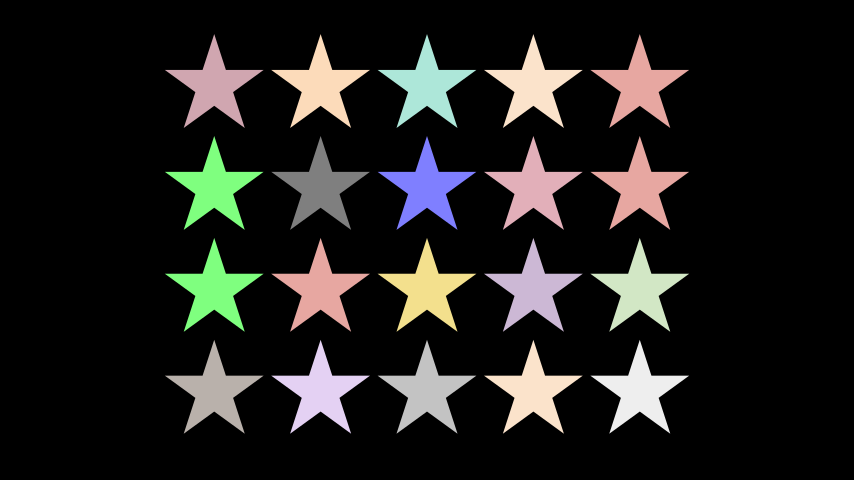

In [70]:
%%manim $param
class Shapes(Scene):
    def construct(self):
        stars= VGroup()
        for i in range(0,20):
            s= Star(color= random_bright_color(), fill_opacity=1).scale(0.8)
            stars.add(s)
        stars.arrange_in_grid()
        self.add(stars)
        global favoritstar
        favoritstar = stars[16]

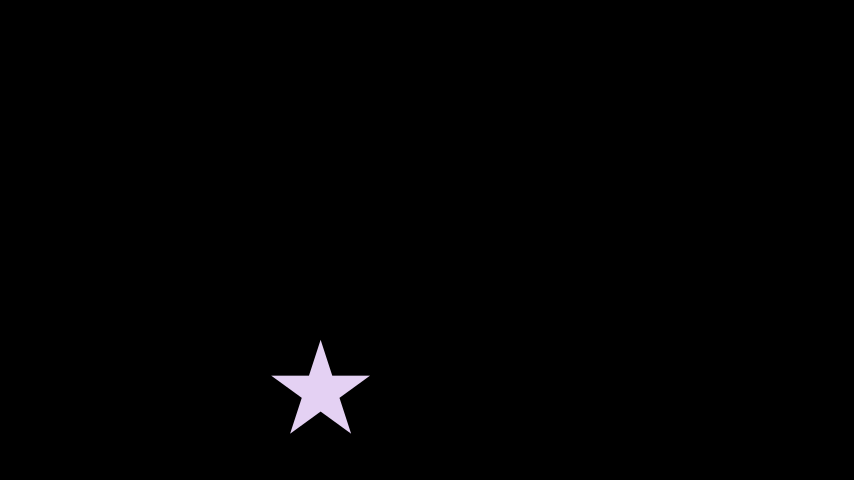

In [73]:
%%manim $param 
class Shapes(Scene):
    def construct(self):
        self.add(favoritstar)

## Pre-Execute Slow Code

- In this example, calculating a random walk for 500 particles and 100000 steps takes about 4 seconds. This step can be done before the actual scene construction, which takes about 0.2 seconds. Making aesthetic changes to the scene will then become easier.

Note: The %%time command will print the execution time of the cells.


In [92]:
%%time
np.random.seed(20)
steps = np.random.choice(a=[-1, 0, 1], size=(100000,1000))
stop = steps.cumsum(0)
end_points= stop[-1]/stop[-1].max()
end_pointsX = end_points[0:499]
end_pointsY = end_points[500:-1]

CPU times: user 3.65 s, sys: 1.19 s, total: 4.85 s
Wall time: 4.89 s


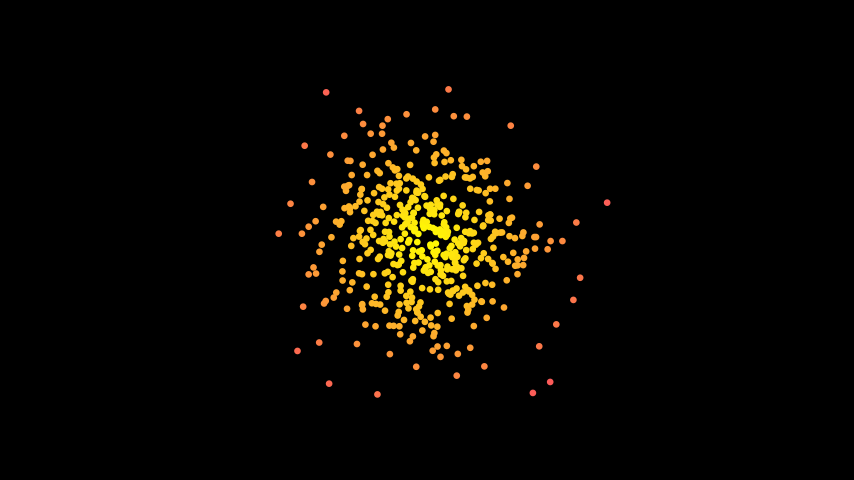

CPU times: user 480 ms, sys: 8.16 ms, total: 488 ms
Wall time: 499 ms


In [93]:
%%time
%%manim $param
class Shapes(Scene):
    def construct(self):
        radius= (end_pointsX*end_pointsX + end_pointsY * end_pointsY)**0.5
        dots = VGroup()
        for  x,y,r in zip(end_pointsX, end_pointsY,radius):
            c= interpolate_color(YELLOW, RED, r)
            dots.add(Dot(color=c,point=[3*x,3*y,0]).scale(0.7))
        self.add(dots)

- If we would have run the code inside the construct method, it would have taken more time to render the animation (and re-rendering can also be painful). But, by pre-executing the code, we can save some time.

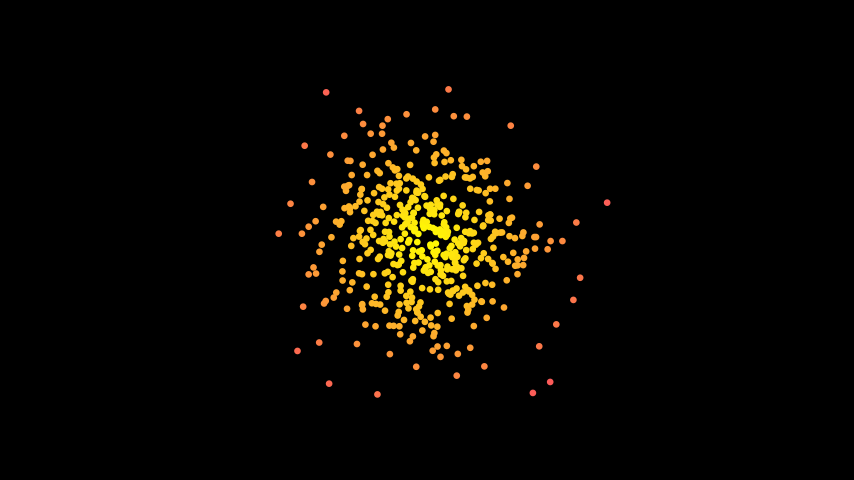

CPU times: user 3.77 s, sys: 2.52 s, total: 6.29 s
Wall time: 6.71 s


In [96]:
%%time
%%manim $param
class Shapes(Scene):
    def construct(self):
        np.random.seed(20)
        steps = np.random.choice(a=[-1, 0, 1], size=(100000,1000))
        stop = steps.cumsum(0)
        end_points= stop[-1]/stop[-1].max()
        end_pointsX = end_points[0:499]
        end_pointsY = end_points[500:-1]

        radius= (end_pointsX*end_pointsX + end_pointsY * end_pointsY)**0.5
        dots = VGroup()
        for  x,y,r in zip(end_pointsX, end_pointsY,radius):
            c= interpolate_color(YELLOW, RED, r)
            dots.add(Dot(color=c,point=[3*x,3*y,0]).scale(0.7))
        self.add(dots)

# Installing Plugins

In [5]:
%%manim $paramVideo

from manim_physics import *

class MyVideo(SpaceScene):
    def construct(self):
        circle = Dot(radius=1).shift(1.5*LEFT+3*UP)
        rect = Square(color=YELLOW, fill_opacity=1)
        ground = Line([-4, -3.5, 0], [4, -3.5, 0])
        wall1 = Line([-4, -3.5, 0], [-4, 3.5, 0])
        wall2 = Line([4, -3.5, 0], [4, 3.5, 0])
        walls = VGroup(ground, wall1, wall2)
        self.add(walls)
        self.add(rect, circle)
        self.make_rigid_body(rect, circle)
        self.make_static_body(walls)
        self.wait(5)